# Persian Gender Recognition
## Authors: Nahal Mirzaie, Tahere Talaie
### Spring 1400

## Clone Project from Github

In [1]:
!git clone 'https://github.com/mirzanahal/Persian-Gender-Recognition'

Cloning into 'Persian-Gender-Recognition'...
remote: Enumerating objects: 2607, done.
remote: Counting objects: 100% (2607/2607), done.
remote: Compressing objects: 100% (2505/2505), done.
remote: Total 2607 (delta 141), reused 2523 (delta 68), pack-reused 0
Receiving objects: 100% (2607/2607), 31.49 MiB | 20.53 MiB/s, done.
Resolving deltas: 100% (141/141), done.


### Install Requirement

In [2]:
!pip install -r Persian-Gender-Recognition/requirement.txt

     |████████████████████████████████| 184kB 33.6MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 317kB 45.8MB/s 
     |████████████████████████████████| 122kB 47.4MB/s 
     |████████████████████████████████| 788kB 44.3MB/s 
     |████████████████████████████████| 122kB 43.5MB/s 
     |████████████████████████████████| 235kB 44.3MB/s 
     |████████████████████████████████| 10.3MB 25.9MB/s 
     |████████████████████████████████| 1.4MB 35.3MB/s 
     |████████████████████████████████| 15.3MB 322kB/s 
     |████████████████████████████████| 9.9MB 40.7MB/s 
     |████████████████████████████████| 2.2MB 40.6MB/s 
     |████████████████████████████████| 368kB 44.0MB/s 
     |████████████████████████████████| 993kB 42.9MB/s 
     |████████████████████████████████| 512kB 44.3MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 22.3MB 1.5MB/s 
     |████████████████████████████████| 27.4MB 163k

### Set Directory

In [3]:
%cd Persian-Gender-Recognition/code

/content/Persian-Gender-Recognition/code


## Import 

In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from os.path import isfile

import config
import utils
import data_path
import data_loader

from classifier import Classifier
from feature_generator import generate_features

## Load Train Datasets

In [2]:
embedding_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'embedding_fasttext.csv'), index_col=0)
embedding_features.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F292,F293,F294,F295,F296,F297,F298,F299,number,label
0,-0.016724,0.017616,0.009455,-0.013369,0.017276,0.076201,0.014863,0.031501,-0.027082,0.349909,...,0.027879,-0.021417,-0.000200,-0.005095,-0.006116,-0.008217,-0.015635,0.018951,289,0
1,-0.058125,0.009000,0.011841,-0.012871,0.055241,0.062717,0.029732,-0.027903,-0.049152,0.414287,...,-0.016553,-0.012303,0.000886,0.011415,0.000866,-0.011235,-0.028773,0.014173,504,0
2,0.000008,0.030201,-0.010074,-0.028357,0.013431,0.055704,0.027906,0.017172,-0.062071,0.361386,...,0.002865,-0.020125,0.004039,0.034927,-0.006673,-0.027432,0.001973,-0.019890,262,0
3,0.023368,0.074310,0.004460,-0.041999,0.041976,0.022968,0.044264,0.077894,-0.065665,0.312161,...,-0.000737,-0.029549,-0.004705,0.038683,0.020206,-0.012884,-0.010022,-0.024235,276,0
4,-0.014248,0.029315,0.000213,-0.018357,0.036656,0.043824,0.034683,-0.010164,-0.040589,0.398027,...,-0.002552,-0.018372,0.010154,0.023136,-0.005387,-0.023447,-0.008050,-0.025579,510,0


In [3]:
psychological_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'psychological_features.csv'), index_col=0)
psychological_features.head()

,PSY_F36,PSY_F37,PSY_F38,PSY_F39,PSY_F47,PSY_F48,number,label
0,25,16,0,0,0,0,289,0
1,2,5,0,1,0,2,504,0
2,19,16,0,0,0,0,262,0
3,7,9,0,0,0,0,276,0
4,33,44,0,4,0,0,510,0


In [4]:
structural_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'structural_features.csv'), index_col=0)
structural_features.head()

,STR_F25,STR_F26,STR_F27,STR_F28,STR_F29,number,label
0,1,1,55.0,0.0,122.5,289,0
1,0,1,18.0,0.0,92.0,504,0
2,1,1,53.0,0.0,117.5,262,0
3,0,1,20.0,0.0,80.0,276,0
4,1,10,14.3,0.0,276.5,510,0


In [5]:
syntactics_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'syntactics_features.csv'), index_col=0)
syntactics_features.head()

,SYN_F18,SYN_F19,SYN_F20,SYN_F21,SYN_F22,SYN_F23,SYN_F24,number,label
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,289,0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,504,0
2,0.0,0.000000,0.0,0.0,0.0,0.012766,0.004255,262,0
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,276,0
4,0.0,0.018083,0.0,0.0,0.0,0.000000,0.000000,510,0


In [6]:
text_dependent_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'text_dependent_features.csv'), index_col=0)
text_dependent_features.head()

,TD_F1,TD_F2,TD_F49,TD_F3,TD_F4,TD_F5,TD_F6,number,label
0,245,0.102041,25,1,0.179592,0.0,0.012245,289,0
1,92,0.217391,20,2,0.163043,0.0,0.000000,504,0
2,235,0.110638,26,3,0.195745,0.0,0.012766,262,0
3,80,0.250000,20,1,0.212500,0.0,0.000000,276,0
4,553,0.048825,27,16,0.249548,0.0,0.018083,510,0


In [7]:
word_dependent_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'word_dependent_features.csv'), index_col=0)
word_dependent_features.head()

,WD_F7,WD_F8,WD_F9,WD_F10,WD_F11,WD_F12,WD_F13,WD_F14,WD_F15,WD_F16,WD_F17,WD_F50,number,label
0,55,4.454545,0.763636,0.600000,0.400000,33,12,119.008264,0.012121,0.285714,1870.088820,3.635431,289,0
1,18,5.111111,0.888889,0.611111,0.388889,14,4,123.456790,0.013072,0.250000,2312.297406,2.736339,504,0
2,53,4.433962,0.830189,0.660377,0.339623,37,10,78.319687,0.007983,0.227273,2495.612060,3.715138,262,0
3,20,4.000000,0.950000,0.800000,0.200000,18,2,50.000000,0.005263,0.105263,5691.891320,2.926418,276,0
4,143,3.867133,0.601399,0.608392,0.391608,66,16,165.289256,0.016645,0.186047,2134.023191,4.147394,510,0


In [8]:
grammatical_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'grammatical_features.csv'), index_col=0)
grammatical_features.head()

,GRM_F30,GRM_F31,GRM_F32,GRM_F33,GRM_F34,GRM_F35,GRM_F40,GRM_F41,GRM_F42,GRM_F51,number,label
0,6,2,16,0,3,6,0,3,1,0,289,0
1,1,1,8,0,1,1,1,3,1,1,504,0
2,2,2,9,0,4,5,6,0,1,1,262,0
3,1,0,3,1,2,0,2,1,1,0,276,0
4,9,6,36,0,17,7,7,7,5,7,510,0


## Generate Train Features

In [9]:
features_list = [embedding_features, psychological_features, structural_features, syntactics_features, text_dependent_features, word_dependent_features, grammatical_features]

features = features_list.pop()
for feature in features_list:
  features = pd.merge(features, feature, left_on=['label', 'number'], right_on=['label', 'number'])

print(features.shape)
features.head()

(2000, 349)


,GRM_F30,GRM_F31,GRM_F32,GRM_F33,GRM_F34,GRM_F35,GRM_F40,GRM_F41,GRM_F42,GRM_F51,...,WD_F9,WD_F10,WD_F11,WD_F12,WD_F13,WD_F14,WD_F15,WD_F16,WD_F17,WD_F50
0,6,2,16,0,3,6,0,3,1,0,...,0.763636,0.600000,0.400000,33,12,119.008264,0.012121,0.285714,1870.088820,3.635431
1,1,1,8,0,1,1,1,3,1,1,...,0.888889,0.611111,0.388889,14,4,123.456790,0.013072,0.250000,2312.297406,2.736339
2,2,2,9,0,4,5,6,0,1,1,...,0.830189,0.660377,0.339623,37,10,78.319687,0.007983,0.227273,2495.612060,3.715138
3,1,0,3,1,2,0,2,1,1,0,...,0.950000,0.800000,0.200000,18,2,50.000000,0.005263,0.105263,5691.891320,2.926418
4,9,6,36,0,17,7,7,7,5,7,...,0.601399,0.608392,0.391608,66,16,165.289256,0.016645,0.186047,2134.023191,4.147394


## Split X, y

In [10]:
y = features['label']
X = features.drop(['label', 'number'], axis=1)

## Normalize

In [11]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Feature Importance

In [12]:
classifier = Classifier('Random Forest', n_estimators=1000, max_depth=5)
classifier.fit(X, y)
feature_importance = classifier.model.feature_importances_

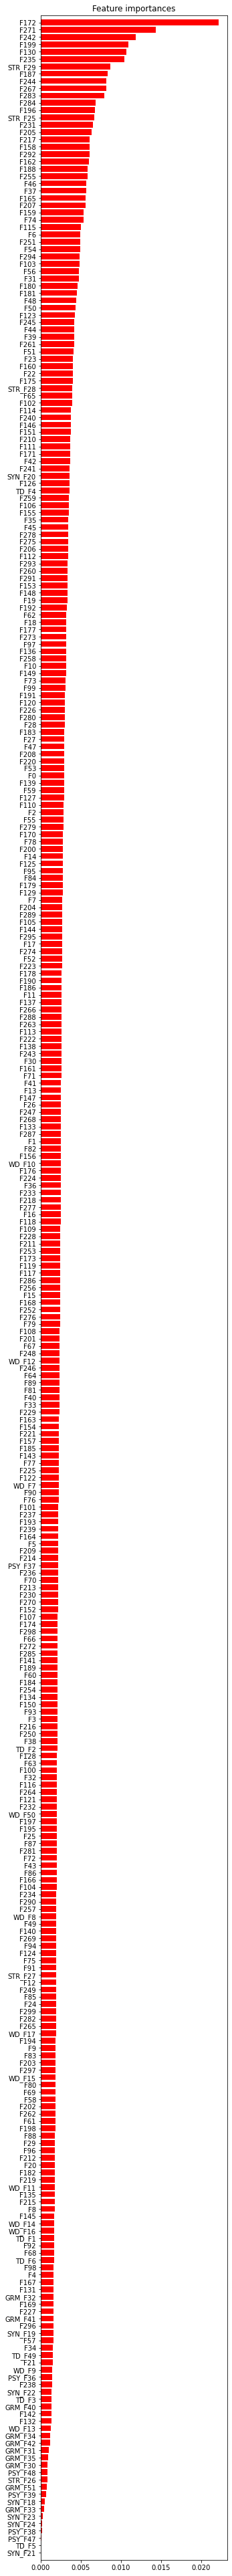

In [13]:
utils.plot_feature_importance(feature_importance, X, figsize=(5, 70))

In [14]:
selected_features = feature_importance > 0.003

In [15]:
X = X.T[selected_features].T
print(X.shape)
print(X.columns)

(2000, 95)
Index(['F6', 'F10', 'F18', 'F19', 'F22', 'F23', 'F31', 'F35', 'F37', 'F39',
       'F42', 'F44', 'F45', 'F46', 'F48', 'F50', 'F51', 'F54', 'F56', 'F62',
       'F65', 'F73', 'F74', 'F97', 'F99', 'F102', 'F103', 'F106', 'F111',
       'F112', 'F114', 'F115', 'F120', 'F123', 'F126', 'F130', 'F136', 'F146',
       'F148', 'F149', 'F151', 'F153', 'F155', 'F158', 'F159', 'F160', 'F162',
       'F165', 'F171', 'F172', 'F175', 'F177', 'F180', 'F181', 'F187', 'F188',
       'F191', 'F192', 'F196', 'F199', 'F205', 'F206', 'F207', 'F210', 'F217',
       'F226', 'F231', 'F235', 'F240', 'F241', 'F242', 'F244', 'F245', 'F251',
       'F255', 'F258', 'F259', 'F260', 'F261', 'F267', 'F271', 'F273', 'F275',
       'F278', 'F283', 'F284', 'F291', 'F292', 'F293', 'F294', 'STR_F25',
       'STR_F28', 'STR_F29', 'SYN_F20', 'TD_F4'],
      dtype='object')


## Classification

In [16]:
rf_model = Classifier('Random Forest', n_estimators=1000, max_depth=10)
rf_model.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |   Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|--------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.606742 | 0.697917 | 0.587629 | 0.528846 | 0.63    | 0.605769 | 0.571429 | 0.583333 | 0.572727 | 0.693182 | 0.607757 |
| recall    | 0.534653 | 0.676768 | 0.553398 | 0.647059 | 0.61165 | 0.567568 | 0.589474 | 0.670213 | 0.724138 | 0.544643 | 0.611956 |
| f1        | 0.568421 | 0.687179 | 0.57     | 0.582011 | 0.62069 | 0.586047 | 0.580311 | 0.623762 | 0.639594 | 0.61     | 0.606801 |
| accuracy  | 0.59     | 0.695    | 0.57     | 0.605    | 0.615   | 0.555    | 0.595    | 0.62     | 0.645    | 0.61     | 0.61     |


In [17]:
svm_model = Classifier('SVM' , kernel='rbf', gamma='scale')
svm_model.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.613636 | 0.61165  | 0.604167 | 0.525773 | 0.647059 | 0.66     | 0.6      | 0.570093 | 0.548673 | 0.659794 | 0.604085 |
| recall    | 0.534653 | 0.636364 | 0.563107 | 0.6      | 0.640777 | 0.594595 | 0.631579 | 0.648936 | 0.712644 | 0.571429 | 0.613408 |
| f1        | 0.571429 | 0.623762 | 0.582915 | 0.56044  | 0.643902 | 0.625592 | 0.615385 | 0.606965 | 0.62     | 0.61244  | 0.606283 |
| accuracy  | 0.595    | 0.62     | 0.585    | 0.6      | 0.635    | 0.605    | 0.625    | 0.605    | 0.62     | 0.595    | 0.6085   |


In [18]:
mlp_model = Classifier('MLP', max_iter=2000 , hidden_layer_sizes=(16,), activation='relu', solver='adam')
mlp_model.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.583333 | 0.555556 | 0.495327 | 0.424242 | 0.602151 | 0.670103 | 0.544444 | 0.51     | 0.535088 | 0.613861 | 0.553411 |
| recall    | 0.415842 | 0.555556 | 0.514563 | 0.494118 | 0.543689 | 0.585586 | 0.515789 | 0.542553 | 0.701149 | 0.553571 | 0.542242 |
| f1        | 0.485549 | 0.555556 | 0.504762 | 0.456522 | 0.571429 | 0.625    | 0.52973  | 0.525773 | 0.606965 | 0.58216  | 0.544344 |
| accuracy  | 0.555    | 0.56     | 0.48     | 0.5      | 0.58     | 0.61     | 0.565    | 0.54     | 0.605    | 0.555    | 0.555    |


In [19]:
nb_model = Classifier('Naive Bayes', var_smoothing=1e-1)
nb_model.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.606061 | 0.703704 | 0.536585 | 0.421053 | 0.724138 | 0.703704 | 0.591837 | 0.65     | 0.454545 | 0.644444 | 0.603607 |
| recall    | 0.39604  | 0.383838 | 0.213592 | 0.188235 | 0.407767 | 0.342342 | 0.305263 | 0.414894 | 0.287356 | 0.258929 | 0.319826 |
| f1        | 0.479042 | 0.496732 | 0.305556 | 0.260163 | 0.521739 | 0.460606 | 0.402778 | 0.506494 | 0.352113 | 0.369427 | 0.415465 |
| accuracy  | 0.565    | 0.615    | 0.5      | 0.545    | 0.615    | 0.555    | 0.57     | 0.62     | 0.54     | 0.505    | 0.563    |


In [20]:
ada_model = Classifier('Ada Boost', n_estimators= 300, learning_rate= 0.5)
ada_model.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.636364 | 0.631068 | 0.576577 | 0.555556 | 0.59596  | 0.649123 | 0.6      | 0.571429 | 0.587629 | 0.690722 | 0.609443 |
| recall    | 0.554455 | 0.656566 | 0.621359 | 0.588235 | 0.572816 | 0.666667 | 0.631579 | 0.595745 | 0.655172 | 0.598214 | 0.614081 |
| f1        | 0.592593 | 0.643564 | 0.598131 | 0.571429 | 0.584158 | 0.657778 | 0.615385 | 0.583333 | 0.619565 | 0.641148 | 0.610708 |
| accuracy  | 0.615    | 0.64     | 0.57     | 0.625    | 0.58     | 0.615    | 0.625    | 0.6      | 0.65     | 0.625    | 0.6145   |


In [21]:
lda_model = Classifier('LDA')
lda_model.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.638298 | 0.575472 | 0.601942 | 0.510204 | 0.59596  | 0.60177  | 0.578431 | 0.567308 | 0.550847 | 0.666667 | 0.58869  |
| recall    | 0.594059 | 0.616162 | 0.601942 | 0.588235 | 0.572816 | 0.612613 | 0.621053 | 0.62766  | 0.747126 | 0.517857 | 0.609952 |
| f1        | 0.615385 | 0.595122 | 0.601942 | 0.546448 | 0.584158 | 0.607143 | 0.598985 | 0.59596  | 0.634146 | 0.582915 | 0.59622  |
| accuracy  | 0.625    | 0.585    | 0.59     | 0.585    | 0.58     | 0.56     | 0.605    | 0.6      | 0.625    | 0.585    | 0.594    |


In [22]:
qda_model = Classifier('QDA')
qda_model.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.633803 | 0.6      | 0.631579 | 0.446429 | 0.620253 | 0.65625  | 0.6      | 0.567901 | 0.590164 | 0.616667 | 0.596305 |
| recall    | 0.445545 | 0.393939 | 0.349515 | 0.294118 | 0.475728 | 0.378378 | 0.410526 | 0.489362 | 0.413793 | 0.330357 | 0.398126 |
| f1        | 0.523256 | 0.47561  | 0.45     | 0.35461  | 0.538462 | 0.48     | 0.4875   | 0.525714 | 0.486486 | 0.430233 | 0.475187 |
| accuracy  | 0.59     | 0.57     | 0.56     | 0.545    | 0.58     | 0.545    | 0.59     | 0.585    | 0.62     | 0.51     | 0.5695   |


In [39]:
knn_model = Classifier('KNN', n_neighbors=5)
knn_model.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.653333 | 0.573034 | 0.595238 | 0.54878  | 0.64557  | 0.684211 | 0.53012  | 0.581395 | 0.584158 | 0.617284 | 0.601312 |
| recall    | 0.485149 | 0.515152 | 0.485437 | 0.529412 | 0.495146 | 0.585586 | 0.463158 | 0.531915 | 0.678161 | 0.446429 | 0.521554 |
| f1        | 0.556818 | 0.542553 | 0.534759 | 0.538922 | 0.56044  | 0.631068 | 0.494382 | 0.555556 | 0.62766  | 0.518135 | 0.556029 |
| accuracy  | 0.61     | 0.57     | 0.565    | 0.615    | 0.6      | 0.62     | 0.55     | 0.6      | 0.65     | 0.535    | 0.5915   |


## Load Test Dataset

In [40]:
embedding_features_test = pd.read_csv(os.path.join(data_path.DATA_PATH, 'test', 'embedding_fasttext.csv'), index_col=0)
embedding_features_test.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F292,F293,F294,F295,F296,F297,F298,F299,number,label
0,-0.096663,-0.005718,-0.023596,-0.043770,0.045183,0.052883,0.031503,0.015052,-0.099338,0.508919,...,-0.002916,-0.088808,0.001066,0.070437,-0.084635,-0.042275,-0.023861,-0.068833,1053,0
1,-0.029366,0.042274,-0.020876,-0.020548,0.016660,0.048140,0.022652,0.065674,-0.039919,0.313196,...,0.005810,0.000277,0.010578,0.007308,0.000829,0.004192,0.003890,0.013595,1047,0
2,-0.033550,0.029519,-0.003604,-0.033160,0.044146,0.072253,0.022969,0.029069,-0.052692,0.426592,...,-0.004936,-0.042481,-0.010211,0.034535,-0.018241,-0.011269,-0.009725,-0.002662,1090,0
3,-0.023381,0.013995,-0.005057,-0.012071,0.052829,0.062844,0.035517,0.005210,-0.050807,0.423678,...,-0.019221,-0.020712,-0.004718,0.019631,-0.005821,-0.020736,-0.019597,-0.020837,1084,0
4,-0.010696,0.022952,0.000615,-0.013578,0.022903,0.049594,0.027033,-0.036066,-0.011750,0.412084,...,-0.028522,-0.017165,0.011075,0.009762,0.015289,-0.015515,-0.013420,0.001759,1127,0


In [41]:
psychological_features_test = pd.read_csv(os.path.join(data_path.DATA_PATH, 'test', 'psychological_features.csv'), index_col=0)
psychological_features_test.head()

,PSY_F36,PSY_F37,PSY_F38,PSY_F39,PSY_F47,PSY_F48,number,label
0,1,2,0,2,0,1,1053,0
1,20,43,0,0,0,1,1047,0
2,20,68,0,6,0,3,1090,0
3,48,59,0,2,0,0,1084,0
4,38,79,2,6,0,0,1127,0


In [42]:
structural_features_test = pd.read_csv(os.path.join(data_path.DATA_PATH, 'test', 'structural_features.csv'), index_col=0)
structural_features_test.head()

,STR_F25,STR_F26,STR_F27,STR_F28,STR_F29,number,label
0,0,1,18.000000,0.0,65.00,1053,0
1,0,2,25.500000,0.0,199.00,1047,0
2,0,5,20.400000,0.0,424.00,1090,0
3,1,11,13.818182,0.0,294.50,1084,0
4,7,7,25.285714,0.0,93.75,1127,0


In [43]:
syntactics_features_test = pd.read_csv(os.path.join(data_path.DATA_PATH, 'test', 'syntactics_features.csv'), index_col=0)
syntactics_features_test.head()

,SYN_F18,SYN_F19,SYN_F20,SYN_F21,SYN_F22,SYN_F23,SYN_F24,number,label
0,0.000000,0.000000,0.000,0.0,0.030769,0.0,0.0,1053,0
1,0.000000,0.010050,0.000,0.0,0.010050,0.0,0.0,1047,0
2,0.007075,0.023585,0.000,0.0,0.000000,0.0,0.0,1090,0
3,0.010187,0.018676,0.000,0.0,0.000000,0.0,0.0,1084,0
4,0.002667,0.009333,0.004,0.0,0.000000,0.0,0.0,1127,0


In [44]:
text_dependent_features_test = pd.read_csv(os.path.join(data_path.DATA_PATH, 'test', 'text_dependent_features.csv'), index_col=0)
text_dependent_features_test.head()

,TD_F1,TD_F2,TD_F49,TD_F3,TD_F4,TD_F5,TD_F6,number,label
0,65,0.276923,18,1,0.215385,0.0,0.000000,1053,0
1,199,0.125628,25,0,0.180905,0.0,0.030151,1047,0
2,424,0.068396,29,7,0.214623,0.0,0.009434,1090,0
3,589,0.047538,28,7,0.207131,0.0,0.018676,1084,0
4,750,0.042667,32,16,0.181333,0.0,0.016000,1127,0


In [45]:
word_dependent_features_test = pd.read_csv(os.path.join(data_path.DATA_PATH, 'test', 'word_dependent_features.csv'), index_col=0)
word_dependent_features_test.head()

,WD_F7,WD_F8,WD_F9,WD_F10,WD_F11,WD_F12,WD_F13,WD_F14,WD_F15,WD_F16,WD_F17,WD_F50,number,label
0,18,3.611111,0.833333,0.500000,0.500000,13,2,246.913580,0.026144,0.133333,2167.778818,2.630253,1053,0
1,51,3.901961,0.745098,0.588235,0.411765,33,4,276.816609,0.028235,0.105263,2988.187481,3.422026,1047,0
2,102,4.156863,0.745098,0.598039,0.401961,61,22,105.728566,0.010678,0.289474,2343.319559,4.168859,1090,0
3,152,3.875000,0.611842,0.572368,0.427632,72,14,147.160665,0.014814,0.150538,2224.861374,4.239969,1084,0
4,177,4.237288,0.593220,0.576271,0.423729,72,32,104.695330,0.010529,0.304762,1646.956733,4.417753,1127,0


In [46]:
grammatical_features_test = pd.read_csv(os.path.join(data_path.DATA_PATH, 'test', 'grammatical_features.csv'), index_col=0)
grammatical_features_test.head()

,GRM_F30,GRM_F31,GRM_F32,GRM_F33,GRM_F34,GRM_F35,GRM_F40,GRM_F41,GRM_F42,GRM_F51,number,label
0,1,1,3,0,2,1,0,3,1,0,1053,0
1,2,6,12,0,3,2,1,6,1,0,1047,0
2,11,4,40,0,16,8,5,5,2,2,1090,0
3,15,5,49,0,10,7,9,9,8,2,1084,0
4,10,7,73,1,20,14,13,9,4,8,1127,0


## Generate Test Features

In [47]:
features_list_test = [embedding_features_test, psychological_features_test, structural_features_test, 
                      syntactics_features_test, text_dependent_features_test, word_dependent_features_test, grammatical_features_test]
features_test = features_list_test.pop()
for feature_test in features_list_test:
  features_test = pd.merge(features_test, feature_test, left_on=['label', 'number'], right_on=['label', 'number'])

print(features_test.shape)
features_test.head()

(378, 349)


,GRM_F30,GRM_F31,GRM_F32,GRM_F33,GRM_F34,GRM_F35,GRM_F40,GRM_F41,GRM_F42,GRM_F51,...,WD_F9,WD_F10,WD_F11,WD_F12,WD_F13,WD_F14,WD_F15,WD_F16,WD_F17,WD_F50
0,1,1,3,0,2,1,0,3,1,0,...,0.833333,0.500000,0.500000,13,2,246.913580,0.026144,0.133333,2167.778818,2.630253
1,2,6,12,0,3,2,1,6,1,0,...,0.745098,0.588235,0.411765,33,4,276.816609,0.028235,0.105263,2988.187481,3.422026
2,11,4,40,0,16,8,5,5,2,2,...,0.745098,0.598039,0.401961,61,22,105.728566,0.010678,0.289474,2343.319559,4.168859
3,15,5,49,0,10,7,9,9,8,2,...,0.611842,0.572368,0.427632,72,14,147.160665,0.014814,0.150538,2224.861374,4.239969
4,10,7,73,1,20,14,13,9,4,8,...,0.593220,0.576271,0.423729,72,32,104.695330,0.010529,0.304762,1646.956733,4.417753


## Split X, y

In [48]:
y_test = features_test['label']
X_test = features_test.drop(['label', 'number'], axis=1)

## Normalize



In [49]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## Use Selected Features

In [50]:
X_test = X_test.T[selected_features].T
print(X_test.shape)

(378, 95)


## Prediction on Testset

In [53]:
predictions = rf_model.predict_label(X_test)
print('Random Forest model testset accuracy is {}.'.format(accuracy_score(y_test, predictions)))

Random Forest model testset accuracy is 0.6058201058201058.


In [54]:
predictions = svm_model.predict_label(X_test)
print('SVM model testset accuracy is {}.'.format(accuracy_score(y_test, predictions)))

SVM model testset accuracy is 0.5952380952380952.


In [55]:
predictions = mlp_model.predict_label(X_test)
print('MLP model testset accuracy is {}.'.format(accuracy_score(y_test, predictions)))

MLP model testset accuracy is 0.5714285714285714.


In [56]:
predictions = nb_model.predict_label(X_test)
print('Naive Bayes model testset accuracy is {}.'.format(accuracy_score(y_test, predictions)))

Naive Bayes model testset accuracy is 0.4947089947089947.


In [57]:
predictions = ada_model.predict_label(X_test)
print('AdaBoost model testset accuracy is {}.'.format(accuracy_score(y_test, predictions)))

AdaBoost model testset accuracy is 0.5846560846560847.


In [58]:
predictions = lda_model.predict_label(X_test)
print('LDA model testset accuracy is {}.'.format(accuracy_score(y_test, predictions)))

LDA model testset accuracy is 0.6190476190476191.


In [59]:
predictions = qda_model.predict_label(X_test)
print('QDA model testset accuracy is {}.'.format(accuracy_score(y_test, predictions)))

QDA model testset accuracy is 0.5291005291005291.


In [60]:
predictions = knn_model.predict_label(X_test)
print('KNN model testset accuracy is {}.'.format(accuracy_score(y_test, predictions)))

KNN model testset accuracy is 0.5793650793650794.


## Ensenble Method

## Explorary Idea: Use ensenble idea on all sklearn models and suggest label with maximum occurance.

In [63]:
train_prediction_labels_svm = svm_model.predict_label(X)
train_prediction_labels_rf = rf_model.predict_label(X)
train_prediction_labels_mlp = mlp_model.predict_label(X)
train_prediction_labels_ad = ada_model.predict_label(X)
# train_prediction_labels_nb = nb_model.predict_label(X)
train_prediction_labels_lda = lda_model.predict_label(X)
train_prediction_labels_qda = qda_model.predict_label(X)
train_prediction_labels_knn = knn_model.predict_label(X)


lsts = []
for i in range(len(train_prediction_labels_svm)):
    lsts.append(
        [
            train_prediction_labels_svm[i],
            train_prediction_labels_rf[i],
            train_prediction_labels_mlp[i],
            train_prediction_labels_ad[i],
            # train_prediction_labels_nb[i],
            train_prediction_labels_qda[i],
            train_prediction_labels_knn[i],
            train_prediction_labels_lda[i]
        ]
    )

y_train_pred = [ max(lst, key=lst.count) for lst in lsts]

In [64]:
print(classification_report(y, y_train_pred))
print('Ensenble model accuracy on trainset is {}.'.format(accuracy_score(y, y_train_pred)))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1000
           1       0.95      0.86      0.90      1000

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

Ensenble model accuracy on trainset is 0.906.


In [65]:
test_prediction_labels_svm = svm_model.predict_label(X_test)
test_prediction_labels_rf = rf_model.predict_label(X_test)
test_prediction_labels_mlp = mlp_model.predict_label(X_test)
test_prediction_labels_ad = ada_model.predict_label(X_test)
# test_prediction_labels_nb = nb_model.predict_label(X_test)
test_prediction_labels_lda = lda_model.predict_label(X_test)
test_prediction_labels_qda = qda_model.predict_label(X_test)
test_prediction_labels_knn = knn_model.predict_label(X_test)


lsts = []
for i in range(len(test_prediction_labels_svm)):
    lsts.append(
        [
            test_prediction_labels_svm[i],
            test_prediction_labels_rf[i],
            test_prediction_labels_mlp[i],
            test_prediction_labels_ad[i],
            test_prediction_labels_qda[i],
            # test_prediction_labels_nb[i],
            test_prediction_labels_knn[i],
            test_prediction_labels_lda[i]
        ]
    )

y_test_pred = [max(lst, key=lst.count) for lst in lsts]

In [66]:
print(classification_report(y_test, y_test_pred))
print('Ensenble model accuracy on trainset is {}.'.format(accuracy_score(y_test, y_test_pred)))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       189
           1       0.64      0.58      0.61       189

    accuracy                           0.63       378
   macro avg       0.63      0.63      0.63       378
weighted avg       0.63      0.63      0.63       378

Ensenble model accuracy on trainset is 0.6296296296296297.
